# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [10]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Carregando a base de dados
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

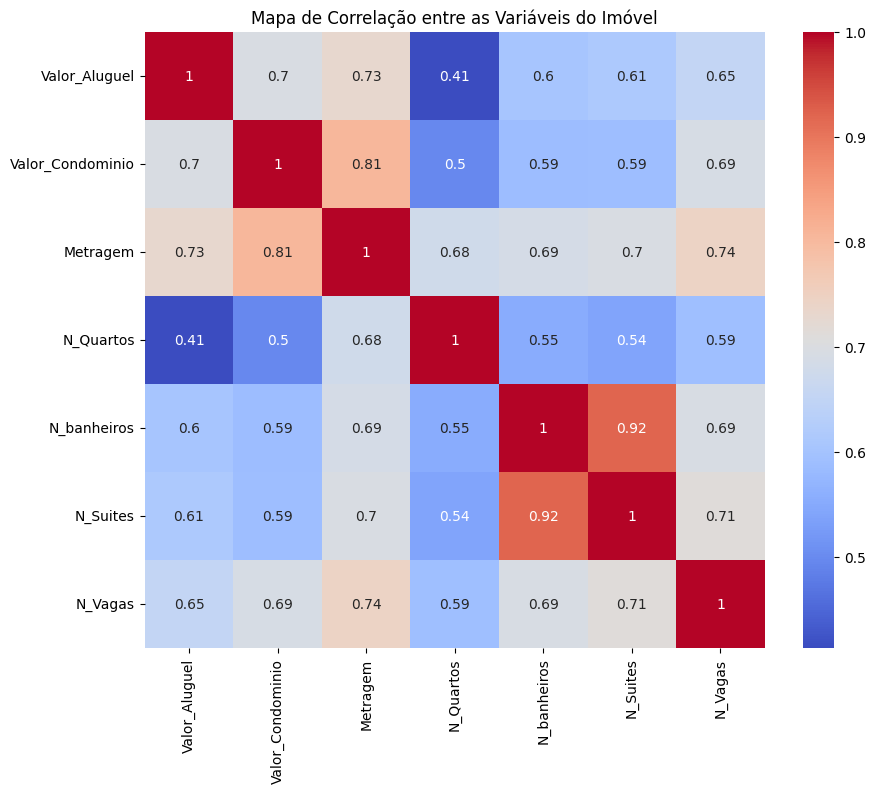

In [12]:
# Escolhendo uma variável por mapa de correlção
matriz_correlacao = df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação entre as Variáveis do Imóvel')
plt.show()
# A variável escolhida será 'Metragem' pois possui a maior correlação positiva com 'Valor_Aluguel'

In [15]:
# Separação das variáveis target e feature
y = df['Valor_Aluguel']
x = df[['Metragem']]

# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [16]:
# Processamento via polynomial feature
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)

# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [17]:
# Separando a base
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

In [18]:
# Treinando a base
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

In [23]:
# Previsões
y_pred = model.predict(x_test)
y_pred_quadratica = model.predict(x_test)

C:\Users\henri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


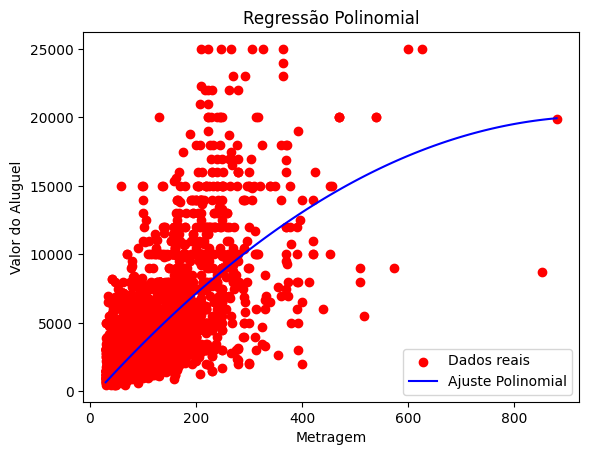

In [24]:
# Gráfico
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(x, y, color='red', label='Dados reais')  
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')  
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

In [26]:
# Métrica R²
r2_quadratica = r2_score(y_test, y_pred_quadratica)
print(f'R² da Regressão quadrática: {r2_quadratica:.4f}')

R² da Regressão quadrática: 0.5423


# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

In [27]:
# Processamento via polynomial feature
poly_features = PolynomialFeatures(degree=4)
x_poly = poly_features.fit_transform(x)

In [28]:
# Separando a base
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

In [29]:
# Treinando a base
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# Previsões
y_pred = model.predict(x_test)
y_pred_quarta = model.predict(x_test)

C:\Users\henri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


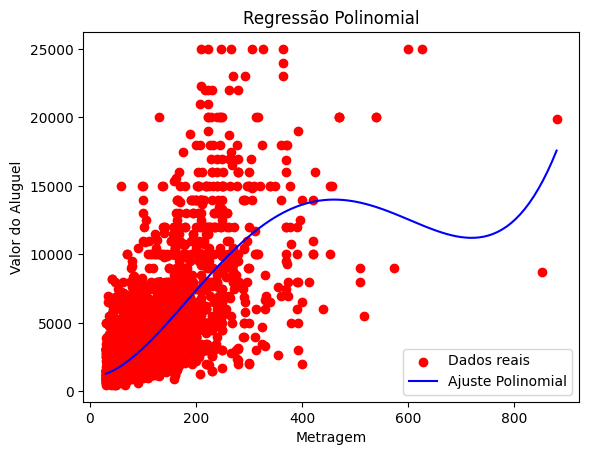

In [31]:
# Gráfico
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(x, y, color='red', label='Dados reais')  
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')  
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

In [32]:
# Métrica R²
r2_quadratica = r2_score(y_test, y_pred_quarta)
print(f'R² da Regressão quadrática: {r2_quadratica:.4f}')

R² da Regressão quadrática: 0.5596


In [ ]:
# Podemos observar uma leve melhora na capacidade regressiva do modelo, 0.54 para 0.55 quando aumentamos o grau da regressão

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.

 As três técnicas têm como objetivo diminuir o overfitting do modelo, elas tentam impedir que o modelo seja hiperespecífico assim conseguindo abranger uma maior parte de exemplos corretos na vida real (ou base de dados nova adicionada).
Para nosso exemplo usaremos a seguinte analogia: 
 
  O governo é o programa de predição de aluguel e para conseguir fazer isso ele contrata vários funcionários públicos (as colunas do df como 'Metragem' e 'N_Quartos') que vão receber diferentes salários com base no impacto dessa previsão (correlação).
  O problema é que os funcionários que recebem mais podem acabar supervalorizando seu trabalho e por uma questão de ego não 'escutar' o que os outros funcionários/variáveis tem a dizer, e isso torno o modelo enviesado. Para evitar esse comportamento o governo tenta criar impostos de regularização.
     
Cada um dos três impostos possuí peculiaridades:

    Imposto de Ridge: é o imposto que é cobrado proporcional ao ganho do funcionário (quão maior a correlação, mais penalizada é a variável).
    
    Imposto de Lasso: ele seria quase como um 'imposto de renda mínima', um valor bruto absoluto é cobrado de todas as variáveis (tanto as que ganham pouco, quanto as que ganham muito), alguns funcionários ganham tão pouco que não tem seu trabalho compensado e acabam se demitindo (tem seu peso zerado para a regressão).
    
    Imposto ElasticNet: um modelo de imposto que une os dois anteriores em um único, demintindo/zerando salário quem não apresenta resultados mas sem permitir a hegemonia de classes produtivas/que ganham muito.